<a href="https://colab.research.google.com/github/zohaib-ansari/Sparks-Foundation/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Zohaib Ansari
# THE SPARKS FOUNDATION
# Data Science & Business Analytics
# TASK 2 - Prediction using Unsupervised ML



In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

# Import Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [17]:
iris = pd.read_csv('Iris.csv')
print("The dataset has been loaded successfully")
#head() will show the first five rows
iris.head()


The dataset has been loaded successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Analyse the Data

In [18]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [20]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Visualization

Text(0, 0.5, 'SepalWidthCm')

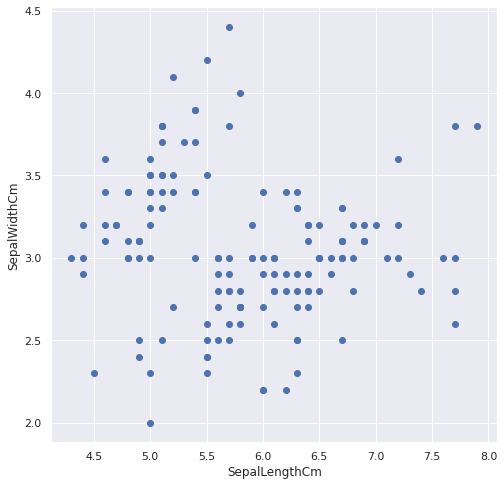

In [21]:
plt.figure(figsize=(8, 8))
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

Text(0, 0.5, 'PetalWidthCm')

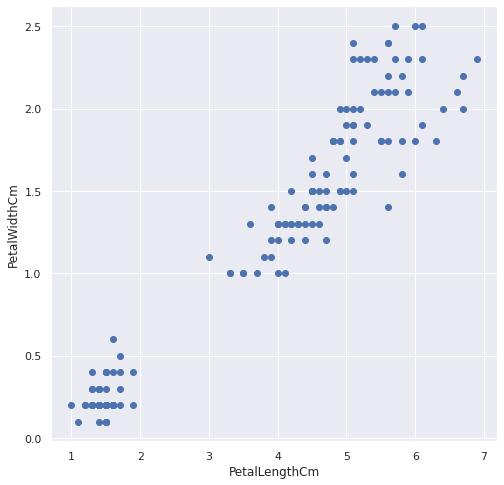

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(iris['PetalLengthCm'],iris['PetalWidthCm'],)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')

# Visualizations Clustering

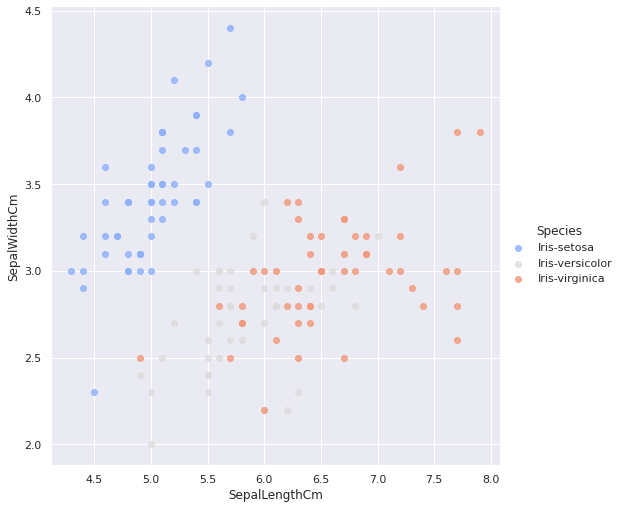

In [23]:
x=iris.copy()
sns.set_style('darkgrid')
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',data=x,hue='Species',palette='coolwarm',height=7,aspect=1,fit_reg=False)

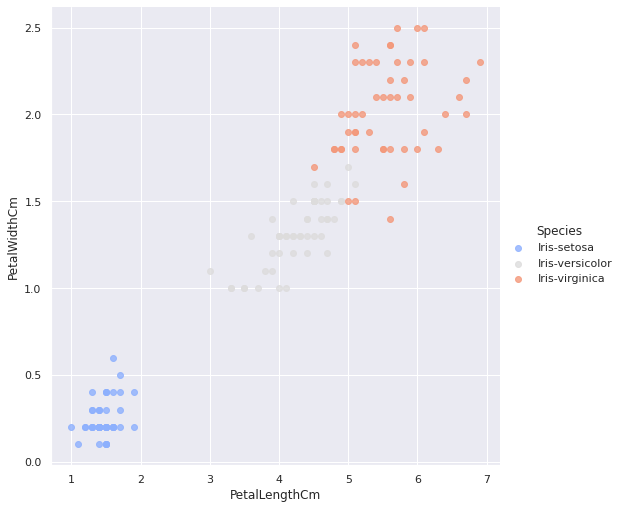

In [24]:
sns.set_style('darkgrid')
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',data=x,hue='Species',palette='coolwarm',height=7,aspect=1,fit_reg=False)

In [25]:
#We won't need id and Species column for predicting the clusters hance drop them
x=iris.drop(['Id','Species'],axis=1)
#check if the columns have been dropped
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**ElboW METHOD - TO FIND OPTIMAL NO OF CLUSTERS POSSIBLE**

In [26]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.31787321428571,
 46.53558205128205,
 39.185257692307694,
 34.31116758986839,
 30.009658569500676,
 28.099259436618134]

Text(0, 0.5, 'Within Cluster Sum of Squares')

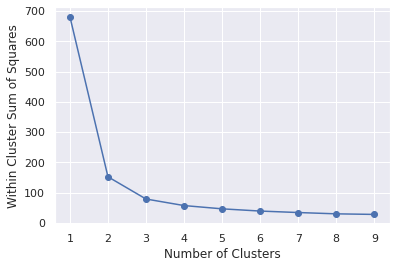

In [27]:
number_cluster=range(1,10)
plt.plot(number_cluster,wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')

# Clustering

In [28]:
kmeans_new=KMeans(3)
kmeans_new.fit(x)
clusters_new=x.copy()
clusters_new['clust_pred']=kmeans_new.fit_predict(clusters_new)
clusters_new

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clust_pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
centers = kmeans_new.cluster_centers_
print(centers)

[[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]


# Plot Clusters

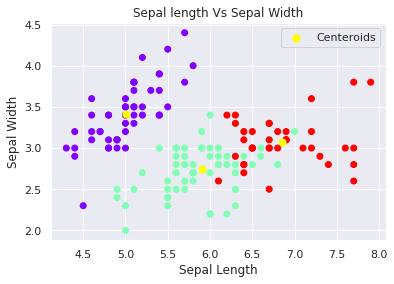

In [30]:
plt.scatter(clusters_new['SepalLengthCm'],clusters_new['SepalWidthCm'],c=clusters_new['clust_pred'],cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],c='yellow',s=50,label='Centeroids')
plt.title("Sepal length Vs Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

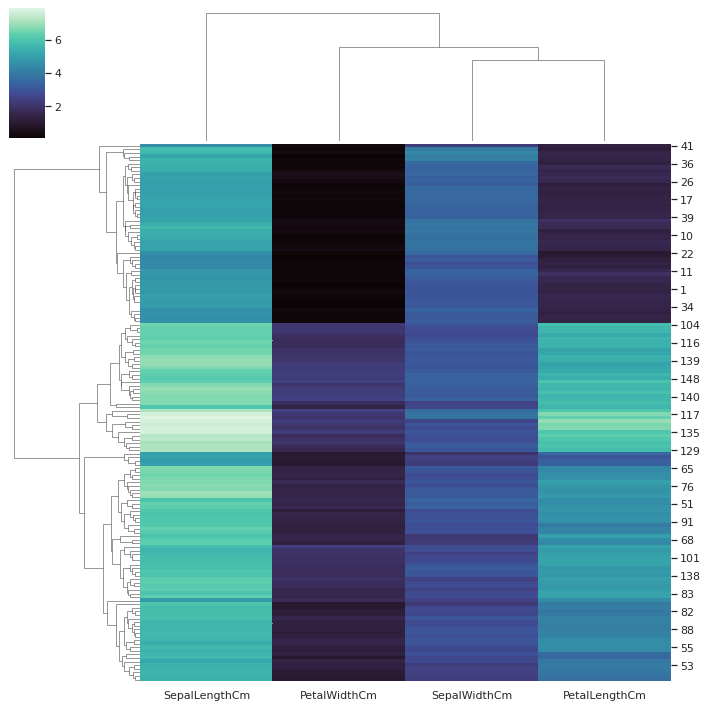

In [31]:
sns.clustermap(x,cmap='mako')